<a href="https://colab.research.google.com/github/Farahnosh-Yousofi/PyTorch-Tutorials/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Learned and worked by following codes and explanations in https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb

In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt



In [3]:
# Data preparing and loading
# We'll use a linear regression formula to make straight line with known parameters

weight = 0.7
bias = 0.3

# create
start = 0
end = 1
step = 0.02
X = torch.arange(0,1, step).unsqueeze(dim = 1)
Y = bias + weight*X

In [4]:
Y

tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260],
        [0.4400],
        [0.4540],
        [0.4680],
        [0.4820],
        [0.4960],
        [0.5100],
        [0.5240],
        [0.5380],
        [0.5520],
        [0.5660],
        [0.5800],
        [0.5940],
        [0.6080],
        [0.6220],
        [0.6360],
        [0.6500],
        [0.6640],
        [0.6780],
        [0.6920],
        [0.7060],
        [0.7200],
        [0.7340],
        [0.7480],
        [0.7620],
        [0.7760],
        [0.7900],
        [0.8040],
        [0.8180],
        [0.8320],
        [0.8460],
        [0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

In [5]:
X[:10], Y[:10], len(X), len(Y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [6]:
# Train and test split of our data
train_split = int(0.8*len(X))
train_split_data, train_split_labels = X[:train_split], Y[:train_split] ## Means all data till train split
train_split_data

test_split_data, test_split_labels = X[train_split:], Y[train_split:]

In [7]:
len(train_split_data),len(train_split_labels)

(40, 40)

In [24]:

#How to visualize out data

def plot_predict(train_data =train_split_data,
                 train_label = train_split_labels,
                 test_data = test_split_data,
                 test_labels = test_split_labels,
                 predictions = None):
  '''
  Plots training data and test data and compares pridections
  '''
  plt.figure(figsize = (10,7))

  #plot training data in blue
  plt.scatter(train_data, train_label, c = "b", s =4, label = "Training data")

  #plot test data in red
  plt.scatter(test_data, test_labels, c = "g", s =4, label = "Test data")

  # Are there predictions
  if predictions is not None:
    #Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", label="Predictions for test data")

  # show the legend
  plt.legend(prop={"size":14})




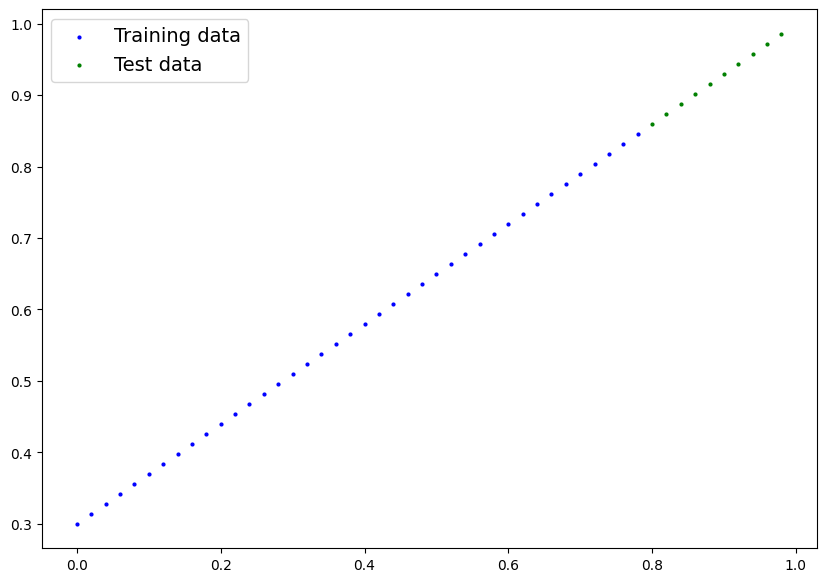

In [25]:
plot_predict(train_split_data,train_split_labels,test_split_data, test_split_labels)

In [18]:
# Build Pytorch Model
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad = True,
                                            dtype = torch.float))

    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype = torch.float))

  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights*x+self.bias # Linear Regression formula



**Check the content of out module**

In [19]:
## PyTorch model building essentials
## Checking the contents of out pytorch model
# create a random seed

torch.manual_seed(42)

#Create an instance of the model(this is the subclass of nn.Module)
module_instance = LinearRegressionModel()

# Checking the model parameters
list(module_instance.parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [20]:
## Checking the parameters as list named parameters
module_instance.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [15]:
weight, bias

(0.7, 0.3)

In [21]:
## Testing our model with torch.inference_mode()
# make predictions
with torch.inference_mode():
  predict = module_instance(test_split_data)

predict

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [22]:
test_split_labels

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

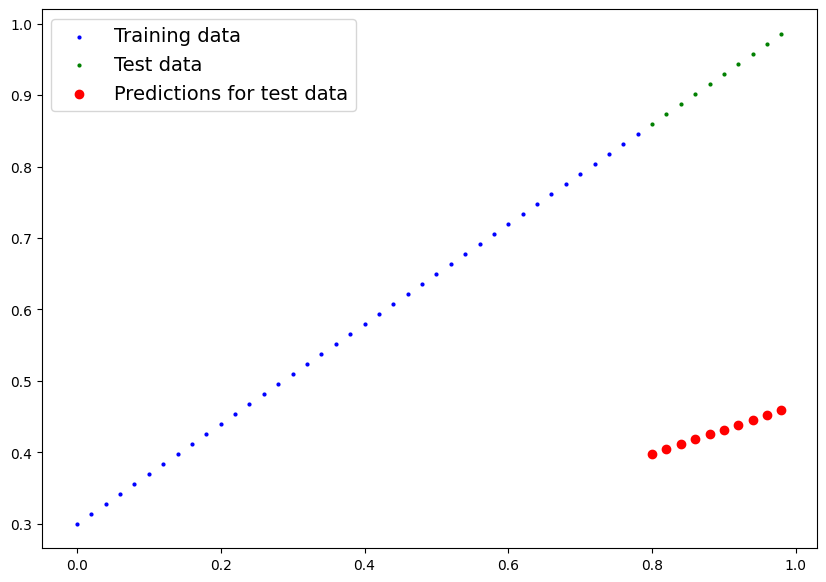

In [26]:
plot_predict(predictions=predict)

In [28]:
predict = module_instance(test_split_data)
predict

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

Use inference mode to just get the predictions and ignore the gradient watching